### SUMMARY OF OUR DATA :
________________________________________________________________
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data 
warehouse, these data stores hold a significant amount of consumer information and 
particular item details.with help of these informations we can find out sales for a perticular item.there are total
`8523 observations` in this dataset.
________________________________________________________________
### Columns Descriptions of dataset :
__________________________________________________________________
- `1.Item_Identifier :`-> This is the column of  Unique product ID with respect to each item.<br><br>

- `2.Item_Weight:`-> Weight of product<br><br>

- `3.Item_Fat_Content:`-> Whether the product is low fat or not<br><br>

- `4.Item_Visibility:`-> The % of total display area of all products in a store allocated to the
  particular product<br><br>
  
- `5.Item_Type:`-> The category to which the product belongs<br><br>

- `6.Item_MRP:`-> Maximum Retail Price (list price) of the product<br><br>

- `7.Outlet_Identifier:`-> Unique store ID<br><br>

- `8.Outlet_Establishment_Year:`-> The year in which store was established<br><br>

- `9.Outlet_Size:`-> The size of the store in terms of ground area covered<br><br>

- `10.Outlet_Location_Type:`-> The type of city in which the store is located<br><br>

- `11.Outlet_Type:`-> Whether the outlet is just a grocery store or some sort of supermarket<br><br>

- `12.Item_Outlet_Sales:`-> Sales of the product in the particulat store. This is the outcome
  variable to be predicted<br><br>

In [2]:
# importing required libraries:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
warnings.filterwarnings('ignore')

In [102]:
train_df=pd.read_csv("D:\Project\ineuron_project\Train.csv")
test_df=pd.read_csv("D:\Project\ineuron_project\Test.csv")

### Basic Information of Dataset :

In [103]:
# first 5 rows in train dataset:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
# first 5 rows in test dataset:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [105]:
# shape of the traindataset and test dataset:
print("Shape of the train dataset is ",train_df.shape)
print("Shape of the test dataset is ",test_df.shape)

Shape of the train dataset is  (8523, 12)
Shape of the test dataset is  (5681, 11)


In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [107]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [108]:
train_df.duplicated().sum()

0

In [109]:
test_df.duplicated().sum()

0

**No duplicated rows with respect to train and test datasets.**

In [110]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**we can see here that in `Item_Weight` and `Outlet_Size` columns , there are missing values with respect to train and test dataset.**

In [111]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [112]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### DATA ASSESSMENT  :
_______________________________________________________________________
- #### DIRTY-DATA:<br><br>
     - `Item_Identifier`      -there is no quality issues.<br><br> 
     
     - `Item_Weight`          -there are missing values. `completeness problem`<br><br>
     
     - `Item_Fat_Content`     -In some cell Low fat and regular are written as LF,low fat and reg respectively. `consistency problem`<br><br>
     
     - `Item_Visibility`      -there is no quality issues.<br><br> 
     
     - `Item_Type`            -All good<br><br>
     
     - `Item_MRP`             -all good<br><br>
     
     - `Outlet_Identifier`    -all good<br><br>
     
     - `Outlet_Establishment_Year`-Datatype is int64.That's not right.<br><br>
     
     - `Outlet_Size`          -there are missing values. `completeness problem`<br><br>
     
     - `Outlet_Location_Type` - all good<br><br>
     
     - `Outlet_Type`          - all good<br><br>
     
     - `Item_Outlet_Sales`    -all good<br><br>
     
     


- #### MESSY DATA :<br><br>
    - `There is no messy data here`<br><br>
- #### EXTRA INFORMATION :<br><br>
    -  `There is no duplicate row in this dataset.`<br>


 ___________________________________________________________________________   

### DATA CLEANING :
___________________________________________________________________________
#### 1.completeness problem :
   - there are two columns having missing values.<br><br>
       - one is `Item_Weight`<br><br>
       - another is `Outlet_Size`
       

     

#### Experiments,coding and testing :
#### 1.For `Item_Weight` column :

In [113]:
train_df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [114]:
train_df[train_df['Item_Identifier']=='FDN15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.5,Low Fat,0.016760,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
759,FDN15,17.5,Low Fat,0.028009,Meat,141.718,OUT010,1998,NaN,Tier 3,Grocery Store,419.454
4817,FDN15,17.5,Low Fat,0.016720,Meat,139.918,OUT013,1987,High,Tier 3,Supermarket Type1,419.454
5074,FDN15,17.5,Low Fat,0.016802,Meat,138.518,OUT018,2009,Medium,Tier 3,Supermarket Type2,2376.906
6163,FDN15,17.5,Low Fat,0.016768,Meat,141.418,OUT045,2002,NaN,Tier 2,Supermarket Type1,1957.452
6952,FDN15,NaN,Low Fat,0.029299,Meat,140.318,OUT019,1985,Small,Tier 1,Grocery Store,139.818
8349,FDN15,NaN,Low Fat,0.016653,Meat,139.518,OUT027,1985,Medium,Tier 3,Supermarket Type3,2936.178


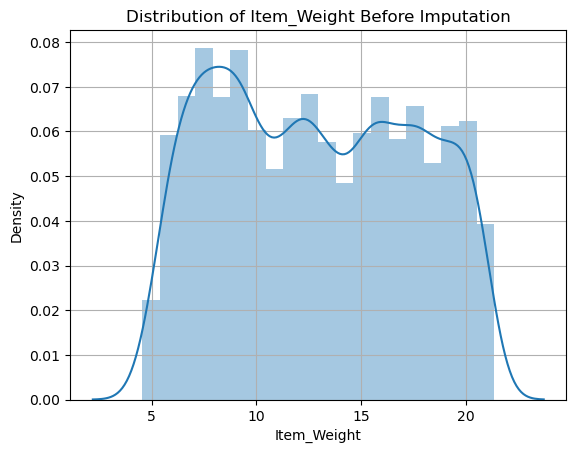

In [115]:
# before imputing distribution of the Item_Weight column :
plt.title("Distribution of Item_Weight Before Imputation")
sns.distplot(train_df['Item_Weight'])
plt.grid()
plt.show()

In [116]:
item_dic={}
for i in list(train_df['Item_Identifier'].unique()):
    item_dic[i]=round(train_df[train_df['Item_Identifier']==i]['Item_Weight'].mean(),2)

In [117]:
train_df['Item_Weight']=train_df['Item_Weight'].fillna('missing')

In [118]:
# coding
weight=[]
for i in range(len(train_df)):
    if train_df['Item_Weight'][i]=='missing':
        val=round(item_dic[train_df['Item_Identifier'][i]],2)
        weight.append(val)
    else:
        weight.append(train_df['Item_Weight'][i])

In [119]:
train_df.drop(columns=['Item_Weight'],inplace=True)

In [120]:
train_df.insert(1,"Item_Weight",weight)

In [121]:
# testing:
train_df[train_df['Item_Identifier']=='FDN15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.5,Low Fat,0.016760,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
759,FDN15,17.5,Low Fat,0.028009,Meat,141.718,OUT010,1998,NaN,Tier 3,Grocery Store,419.454
4817,FDN15,17.5,Low Fat,0.016720,Meat,139.918,OUT013,1987,High,Tier 3,Supermarket Type1,419.454
5074,FDN15,17.5,Low Fat,0.016802,Meat,138.518,OUT018,2009,Medium,Tier 3,Supermarket Type2,2376.906
6163,FDN15,17.5,Low Fat,0.016768,Meat,141.418,OUT045,2002,NaN,Tier 2,Supermarket Type1,1957.452
6952,FDN15,17.5,Low Fat,0.029299,Meat,140.318,OUT019,1985,Small,Tier 1,Grocery Store,139.818
8349,FDN15,17.5,Low Fat,0.016653,Meat,139.518,OUT027,1985,Medium,Tier 3,Supermarket Type3,2936.178


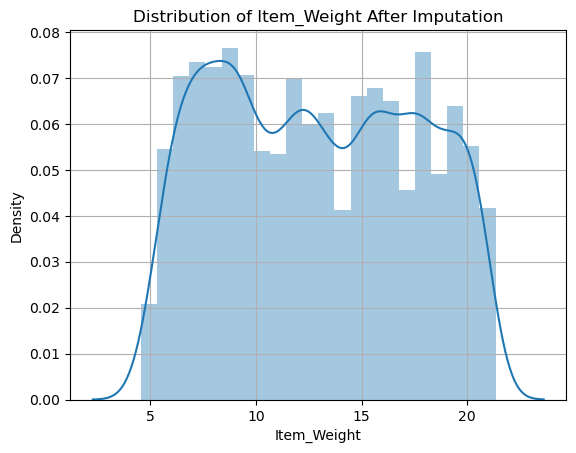

In [122]:
# After imputing distribution of the Item_Weight column :
plt.title("Distribution of Item_Weight After Imputation")
sns.distplot(train_df['Item_Weight'])
plt.grid()
plt.show()

#### For test dataset:

In [126]:
test_df[test_df['Item_Identifier']=='FDL58']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
3619,FDL58,NaN,Regular,0.073790,Snack Foods,265.0568,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [127]:
item_dic={}
for i in list(test_df['Item_Identifier'].unique()):
    item_dic[i]=round(test_df[test_df['Item_Identifier']==i]['Item_Weight'].mean(),2)

In [128]:
test_df['Item_Weight']=test_df['Item_Weight'].fillna('missing')

In [129]:
test_df[test_df['Item_Identifier']=='FDY38']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,missing,Regular,0.118599,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3
1327,FDY38,13.6,Regular,0.119176,Dairy,233.93,OUT046,1997,Small,Tier 1,Supermarket Type1
3622,FDY38,13.6,reg,0.119154,Dairy,231.23,OUT035,2004,Small,Tier 2,Supermarket Type1
4504,FDY38,13.6,Regular,0.119662,Dairy,233.63,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [130]:
weight=[]
for i in range(len(test_df)):
    if test_df['Item_Weight'][i]=='missing':
        val=round(item_dic[test_df['Item_Identifier'][i]],2)
        weight.append(val)
    else:
        weight.append(test_df['Item_Weight'][i])

In [131]:
test_df.drop(columns=['Item_Weight'],inplace=True)

In [132]:
test_df.insert(1,"Item_Weight",weight)

In [133]:
test_df[test_df['Item_Identifier']=='FDY38']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,13.6,Regular,0.118599,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3
1327,FDY38,13.6,Regular,0.119176,Dairy,233.93,OUT046,1997,Small,Tier 1,Supermarket Type1
3622,FDY38,13.6,reg,0.119154,Dairy,231.23,OUT035,2004,Small,Tier 2,Supermarket Type1
4504,FDY38,13.6,Regular,0.119662,Dairy,233.63,OUT018,2009,Medium,Tier 3,Supermarket Type2


#### 2.For `Outlet_Size` column :

In [134]:
missing_no=train_df['Outlet_Size'].isnull().sum()
percentage=missing_no/len(train_df)
print(f"There is almost {round((percentage*100),2)}% missing value in our 'Outlet_Size'column.")

There is almost 28.28% missing value in our 'Outlet_Size'column.


**We can't fill those missing values with most frquent values(mediumn) as there are more than 28% missing values in this columns.**

In [135]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

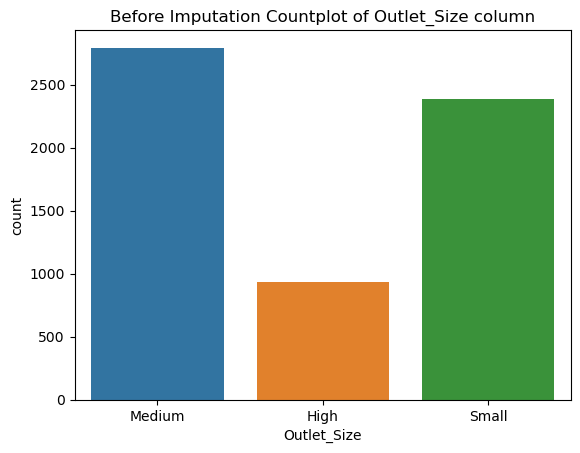

In [136]:
plt.title('Before Imputation Countplot of Outlet_Size column')
sns.countplot(train_df['Outlet_Size'])
plt.show()

In [137]:
# coding:
train_df['Outlet_Size']=train_df['Outlet_Size'].fillna('not_mentioned')

In [138]:
train_df['Outlet_Size'].value_counts()

Medium           2793
not_mentioned    2410
Small            2388
High              932
Name: Outlet_Size, dtype: int64

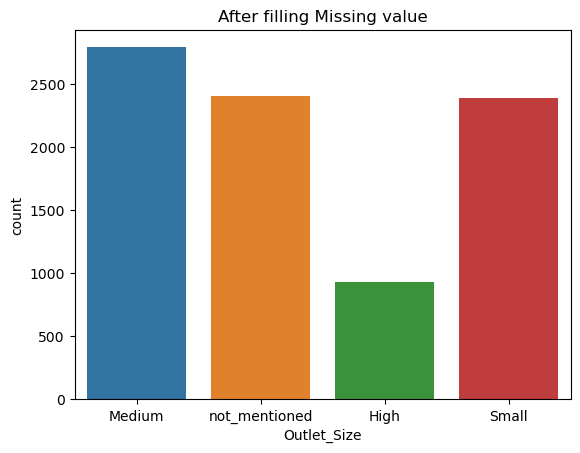

In [139]:
#after filling the missing values with a constant 'not_mentioned',our columns looks like :
plt.title("After filling Missing value")
sns.countplot(train_df['Outlet_Size'])
plt.show()

In [140]:
# testing:
train_df['Outlet_Size'].isnull().sum()

0

In [141]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [142]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,not_mentioned,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Solutions:
__________________________________________________________________________
- for `Item_Weight` column ,an interesting thing has been spotted.Actually this column totally depends on `Item_Identifier`and `Item_Type` columns.So in this case , I have done column transformation. <br><br>
- for `Outlet_Size` column , we see that there is 28.3% data is missing.So we have created a new category `not_mentioned` in place of missing values.Basically we have done 'Missing-Category imputation'.

___________________________________________________________________________

#### 2.Consistency problem :

we have a column `Item_Fat_Content` where In some cell Low fat and regular are written as LF,low fat and reg respectively.<br><br>


In [143]:
# Experiments:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [144]:
#coding:
train_df['Item_Fat_Content']=train_df['Item_Fat_Content'].map({'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat',
                                                     'LF':'Low Fat','reg':'Regular'})

In [145]:
# testing
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### For test dataset:

In [146]:
# Experiments:
test_df['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [147]:
#coding:
test_df['Item_Fat_Content']=test_df['Item_Fat_Content'].map({'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat',
                                                     'LF':'Low Fat','reg':'Regular'})

In [148]:
# testing
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

**SOLUTION :**<BR>
- We have replaced with `Low Fat` and `Regular` respectively.

In [149]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**As we have 4 rows with `nan` values , we simply drop them from dataset.**

In [150]:
train_df=train_df.dropna()

In [151]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,not_mentioned,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,not_mentioned,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [152]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [4]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [154]:
## saving the dataset in folder:
#train_df.to_csv('cleantrain.csv',index=False)
#test_df.to_csv('cleantest.csv',index=False)

In [54]:
train_df=pd.read_csv(r"D:\Project\ineuron_project\process_dataset\cleantrain.csv")
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,not_mentioned,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8514,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8515,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,not_mentioned,Tier 2,Supermarket Type1,549.2850
8516,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8517,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Data cleaning part is done . Now we are ready for EDA on top of train dataset.**

### EXPLORATORY DATA ANALYSIS  and FEATURE ENGINEERING:

We are going to devide colummns as numerical and categorical.

In [55]:
#for numerical columns:
num_cols=[col for col in train_df.columns if train_df[col].dtypes!='O']
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [56]:
# for categorical columns:
cat_cols=[col for col in train_df.columns if train_df[col].dtypes=='O']
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### FOR NUMERICAL COLUMNS:

In [57]:
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [47]:
train_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
,,,,,
Item_Weight,1.000000,-0.009168,0.025978,-0.013430,0.331650
Item_Visibility,-0.009168,1.000000,-0.001155,-0.074325,-0.228297
Item_MRP,0.025978,-0.001155,1.000000,0.004599,0.667803
Outlet_Establishment_Year,-0.013430,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.331650,-0.228297,0.667803,-0.049083,1.000000


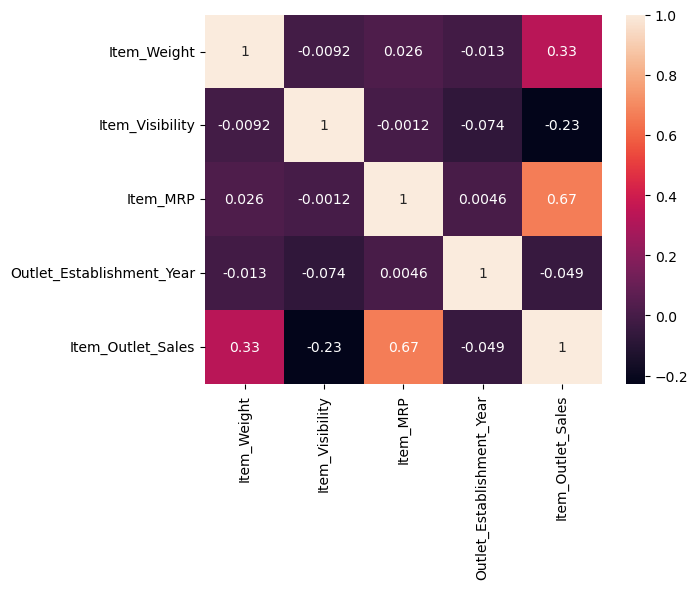

In [48]:
sns.heatmap(train_df.corr(),annot=True)
plt.show()

### converting the Outlet_Establishment_Year column into outlet_Age column:

In [58]:
train_df['Outlet_Establishment_Year']=2023-train_df['Outlet_Establishment_Year']

In [59]:
train_df.rename(columns={'Outlet_Establishment_Year':'Outlet_Age'},inplace=True)

In [60]:
train_df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,24,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,14,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,24,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,25,not_mentioned,Tier 3,Grocery Store,732.3800


#### After Converting correlation and heatmap :

In [63]:
train_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales
,,,,,
Item_Weight,1.000000,-0.009168,0.025978,0.013430,0.331650
Item_Visibility,-0.009168,1.000000,-0.001155,0.074325,-0.228297
Item_MRP,0.025978,-0.001155,1.000000,-0.004599,0.667803
Outlet_Age,0.013430,0.074325,-0.004599,1.000000,0.159083
Item_Outlet_Sales,0.331650,-0.228297,0.667803,0.159083,1.000000


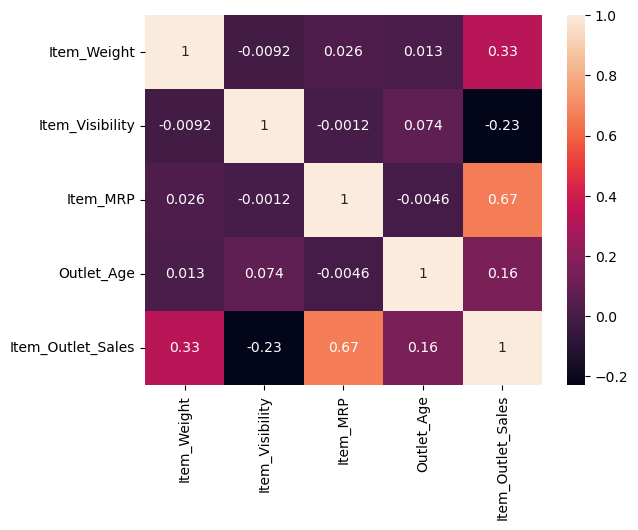

In [64]:
sns.heatmap(train_df.corr(),annot=True)
plt.show()

In [67]:
num_cols=[col for col in train_df.columns if train_df[col].dtypes!='O']
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Age',
 'Item_Outlet_Sales']

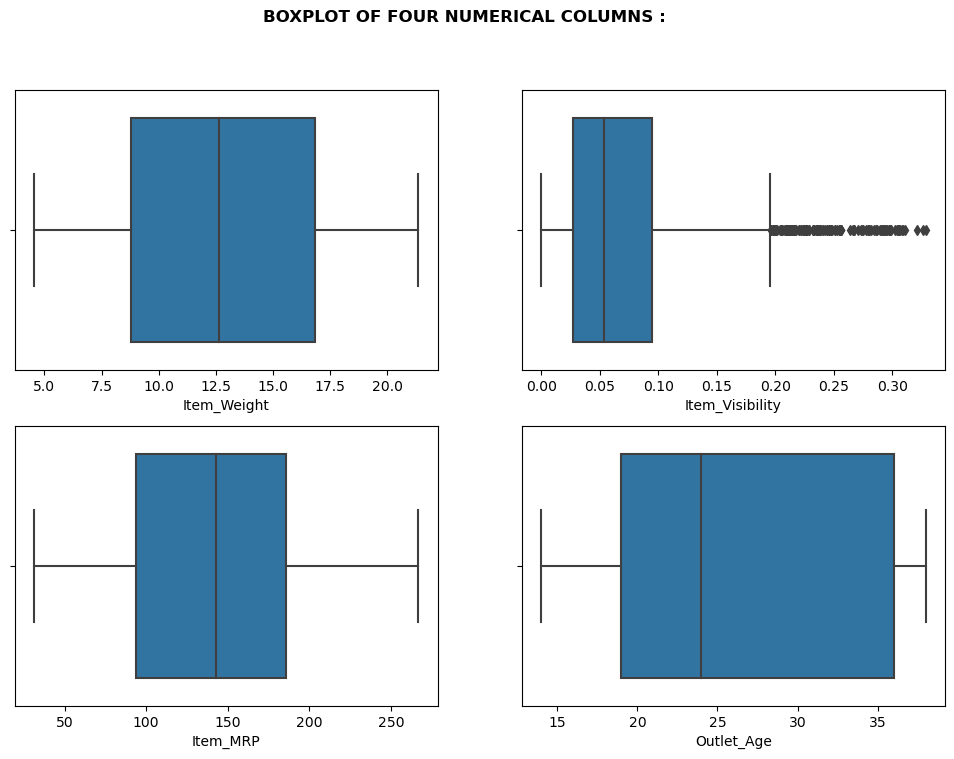

In [68]:
plt.figure(figsize=(12,8))
plt.suptitle('BOXPLOT OF FOUR NUMERICAL COLUMNS :',fontweight='bold')

ax1=plt.subplot(2,2,1)
sns.boxplot(train_df['Item_Weight'],ax=ax1)


ax2=plt.subplot(2,2,2)
sns.boxplot(train_df['Item_Visibility'],ax=ax2)


ax3=plt.subplot(2,2,3)
sns.boxplot(train_df['Item_MRP'],ax=ax3)

ax4=plt.subplot(2,2,4)
sns.boxplot(train_df['Outlet_Age'],ax=ax4)

plt.show()


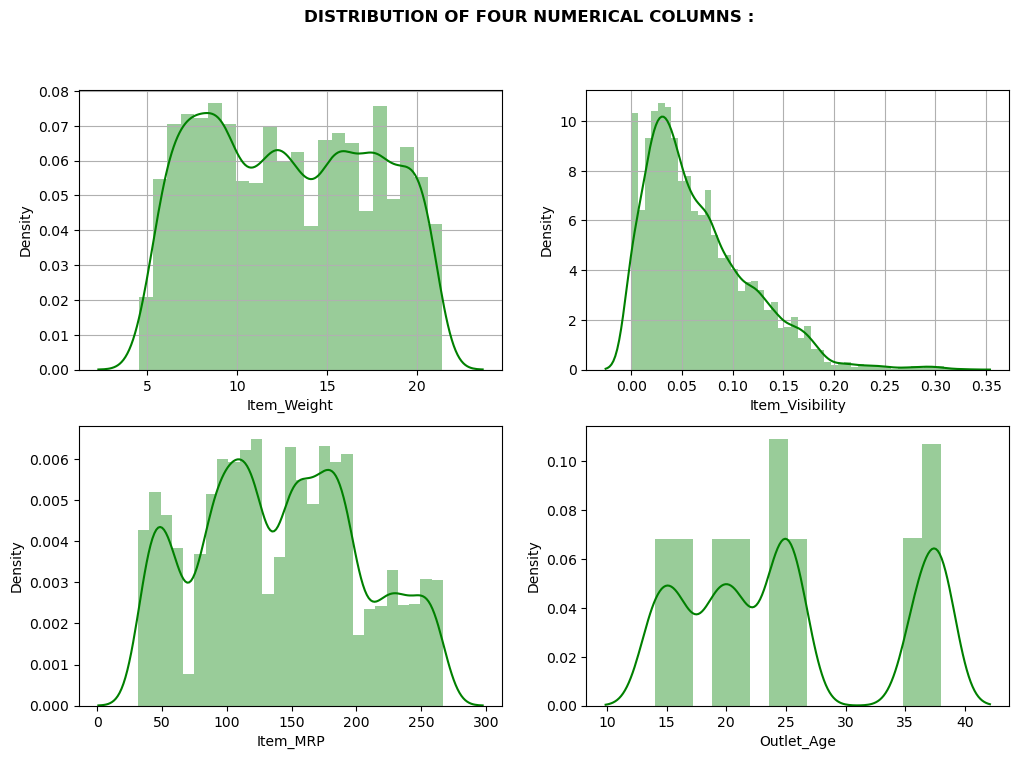

In [69]:
plt.figure(figsize=(12,8))
plt.suptitle('DISTRIBUTION OF FOUR NUMERICAL COLUMNS :',fontweight='bold')

ax1=plt.subplot(2,2,1)
sns.distplot(train_df['Item_Weight'],ax=ax1,color='green')
ax1.grid()


ax2=plt.subplot(2,2,2)
sns.distplot(train_df['Item_Visibility'],ax=ax2,color='green')
ax2.grid()

ax3=plt.subplot(2,2,3)
sns.distplot(train_df['Item_MRP'],ax=ax3,color='green')
ax3.grid()

ax4=plt.subplot(2,2,4)
sns.distplot(train_df['Outlet_Age'],ax=ax4,color='green')
ax3.grid()

plt.show()

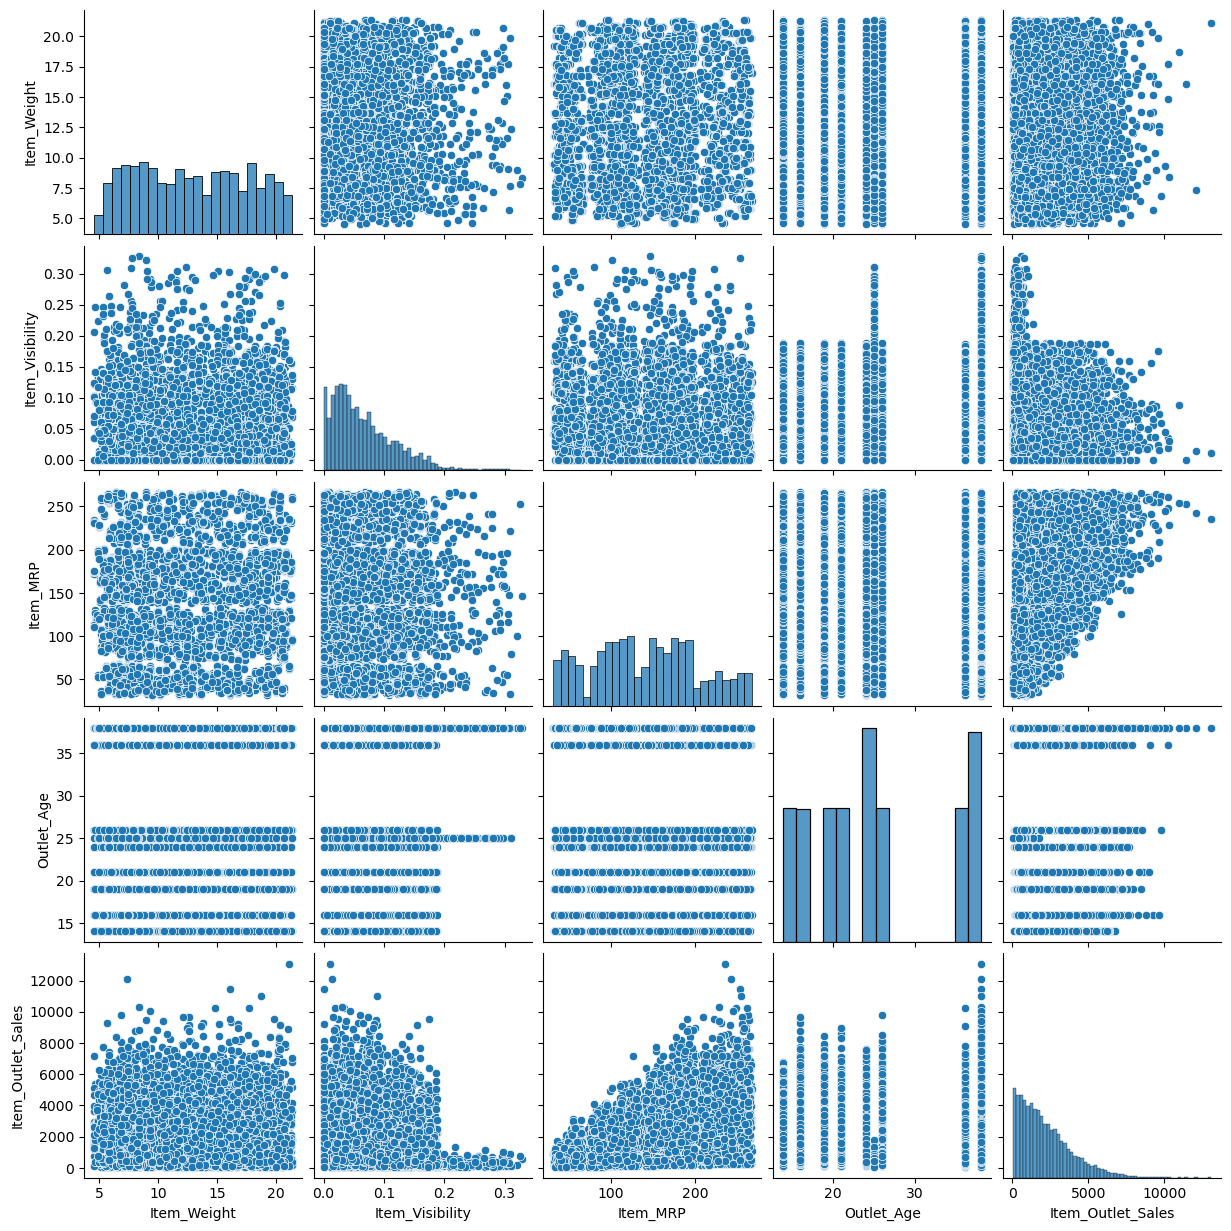

In [70]:
sns.pairplot(train_df)
plt.show()

### OBSERVATION FOR NUMERICAL COLUMNS:
____________________________________________________________________________
- 1.In `Item_Visibility`,there are outliers.<br><br>
- 2.These four columns are not normally distributed.Need to do `power transformation`.<br><br>
- 3.Except `Item_MRP` column, there is no such relationship between other numerical columns and our label column.<br><br>


___________________________________________________________________

### FOR CATEGORICAL COLUMNS:

In [175]:
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [176]:
train_df[cat_cols].describe().T   

,count,unique,top,freq
Item_Identifier,8519,1555,FDG33,10
Item_Fat_Content,8519,2,Low Fat,5516
Item_Type,8519,16,Fruits and Vegetables,1232
Outlet_Identifier,8519,10,OUT013,932
Outlet_Size,8519,4,Medium,2790
Outlet_Location_Type,8519,3,Tier 3,3347
Outlet_Type,8519,4,Supermarket Type1,5577


#### Item_Identifier -column:

In [177]:
train_df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8514    FDF22
8515    FDS36
8516    NCJ29
8517    FDN46
8518    DRG01
Name: Item_Identifier, Length: 8519, dtype: object

In [178]:
def code(x):
    return x[:2]

In [179]:
train_df['Item_Identifier']=train_df['Item_Identifier'].apply(code)

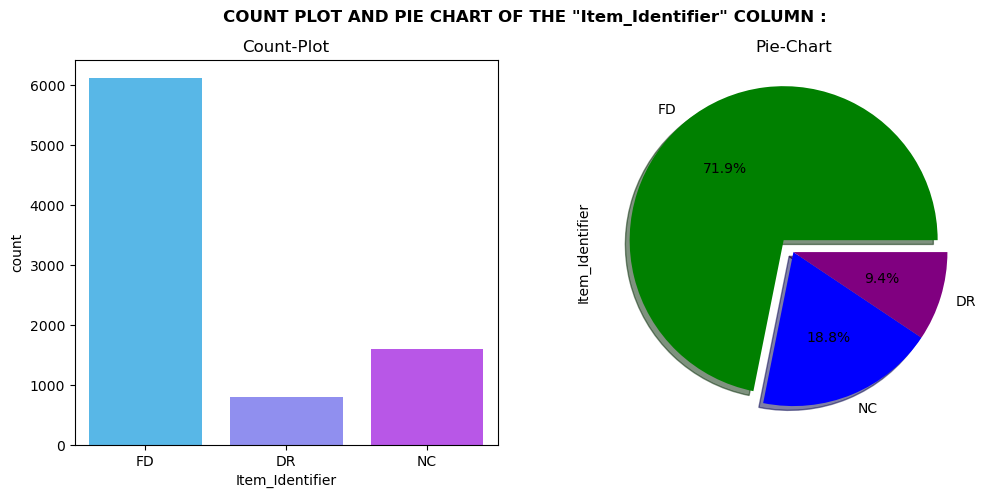

In [188]:
plt.figure(figsize=(12,5))
plt.suptitle('COUNT PLOT AND PIE CHART OF THE "Item_Identifier" COLUMN :',fontweight='bold')

ax1=plt.subplot(1,2,1)
ax1.set_title('Count-Plot')
sns.countplot(train_df['Item_Identifier'],palette='cool')

ax2=plt.subplot(1,2,2)
ax2.set_title('Pie-Chart')
train_df['Item_Identifier'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0.1,0,0],
                                           shadow=True,colors=['green','blue','purple'])
plt.show()

#### Item_Fat_Content -column :

In [99]:
dfc['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

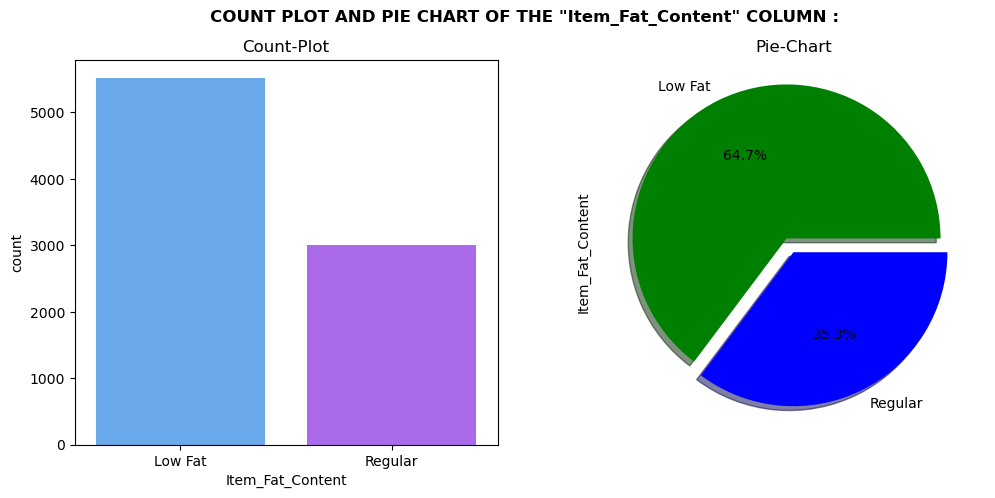

In [189]:
plt.figure(figsize=(12,5))
plt.suptitle('COUNT PLOT AND PIE CHART OF THE "Item_Fat_Content" COLUMN :',fontweight='bold')

ax1=plt.subplot(1,2,1)
ax1.set_title('Count-Plot')
sns.countplot(train_df['Item_Fat_Content'],palette='cool')

ax2=plt.subplot(1,2,2)
ax2.set_title('Pie-Chart')
train_df['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%0.1f%%',
                                                 explode=[0.1,0],shadow=True,colors=['green','blue'])
plt.show()

#### Item_Type -column :

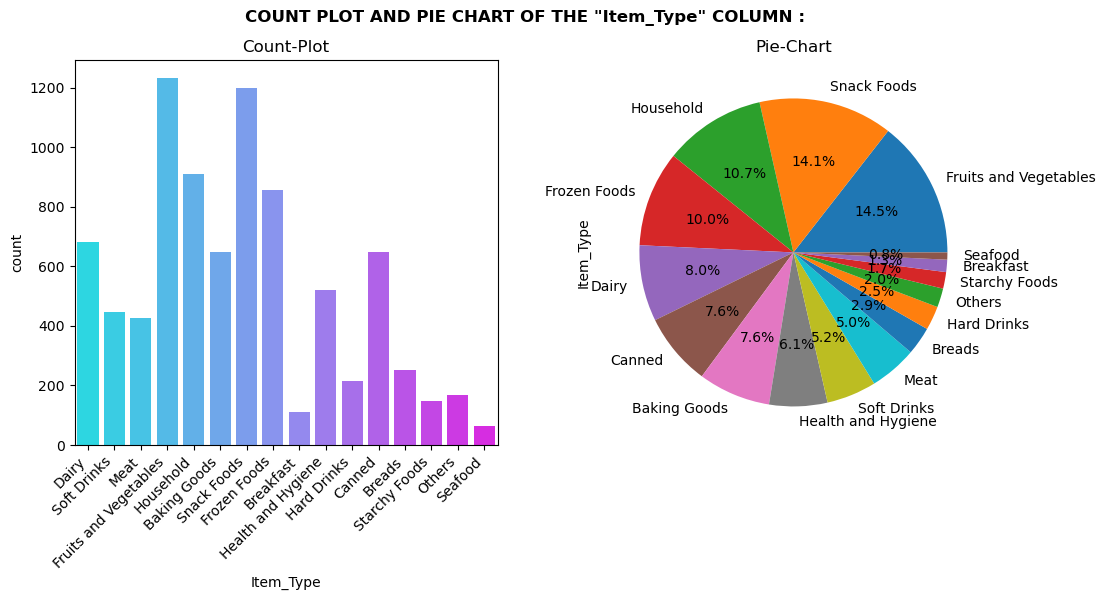

In [71]:
plt.figure(figsize=(12,5))
plt.suptitle('COUNT PLOT AND PIE CHART OF THE "Item_Type" COLUMN :',fontweight='bold')

categories=train_df['Item_Type'].unique()
ax1=plt.subplot(1,2,1)
ax1.set_title('Count-Plot')
ax1.set_xticklabels(categories,rotation=45, ha='right')

sns.countplot(train_df['Item_Type'],palette='cool')

ax2=plt.subplot(1,2,2)
ax2.set_title('Pie-Chart')
train_df['Item_Type'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [196]:
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

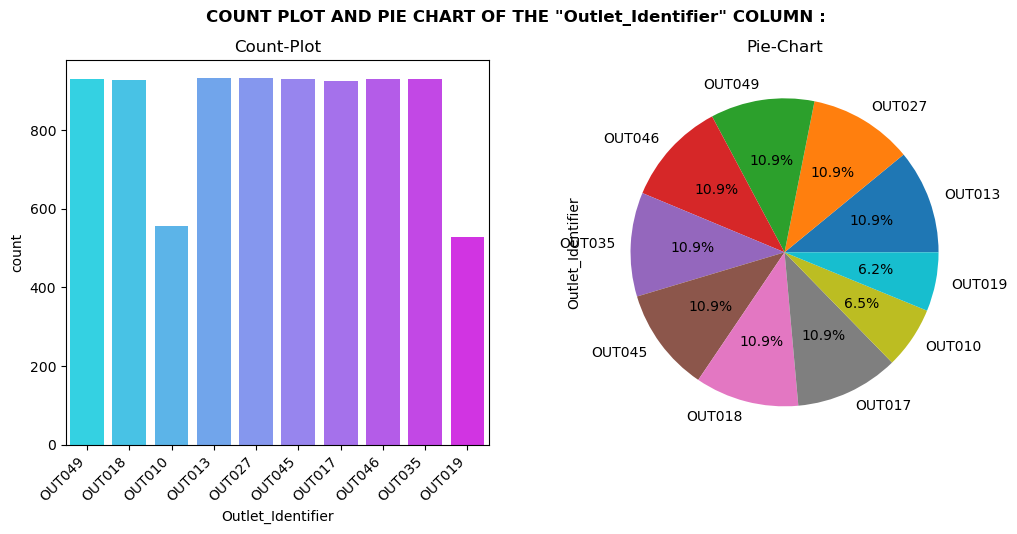

In [72]:
plt.figure(figsize=(12,5))
plt.suptitle('COUNT PLOT AND PIE CHART OF THE "Outlet_Identifier" COLUMN :',fontweight='bold')

categories=train_df['Outlet_Identifier'].unique()
ax1=plt.subplot(1,2,1)
ax1.set_title('Count-Plot')
sns.countplot(train_df['Outlet_Identifier'],palette='cool')
ax1.set_xticklabels(categories,rotation=45, ha='right')

ax2=plt.subplot(1,2,2)
ax2.set_title('Pie-Chart')
train_df['Outlet_Identifier'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [73]:
train_df['Outlet_Identifier'].value_counts()

OUT013    932
OUT027    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: Outlet_Identifier, dtype: int64

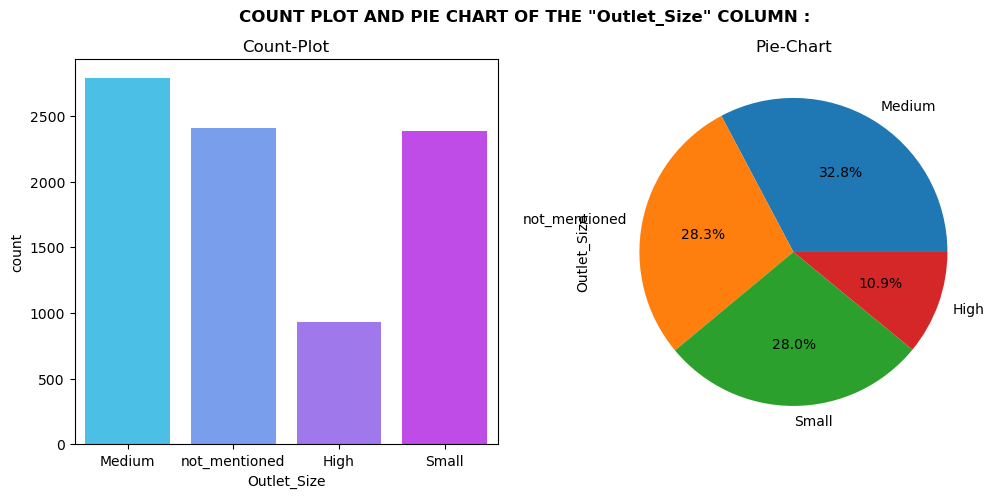

In [202]:
plt.figure(figsize=(12,5))
plt.suptitle('COUNT PLOT AND PIE CHART OF THE "Outlet_Size" COLUMN :',fontweight='bold')

ax1=plt.subplot(1,2,1)
ax1.set_title('Count-Plot')

sns.countplot(train_df['Outlet_Size'],palette='cool')

ax2=plt.subplot(1,2,2)
ax2.set_title('Pie-Chart')
train_df['Outlet_Size'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

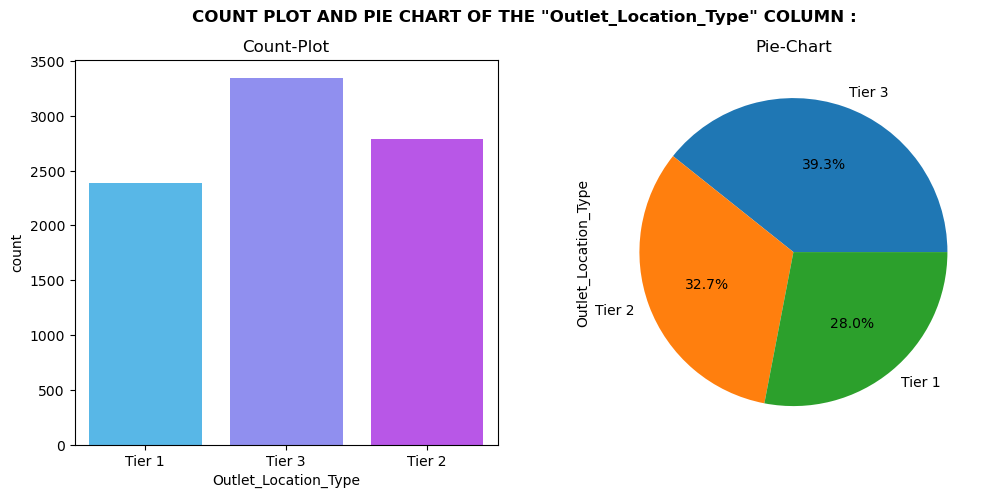

In [203]:
plt.figure(figsize=(12,5))
plt.suptitle('COUNT PLOT AND PIE CHART OF THE "Outlet_Location_Type" COLUMN :',fontweight='bold')

ax1=plt.subplot(1,2,1)
ax1.set_title('Count-Plot')

sns.countplot(train_df['Outlet_Location_Type'],palette='cool')

ax2=plt.subplot(1,2,2)
ax2.set_title('Pie-Chart')
train_df['Outlet_Location_Type'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

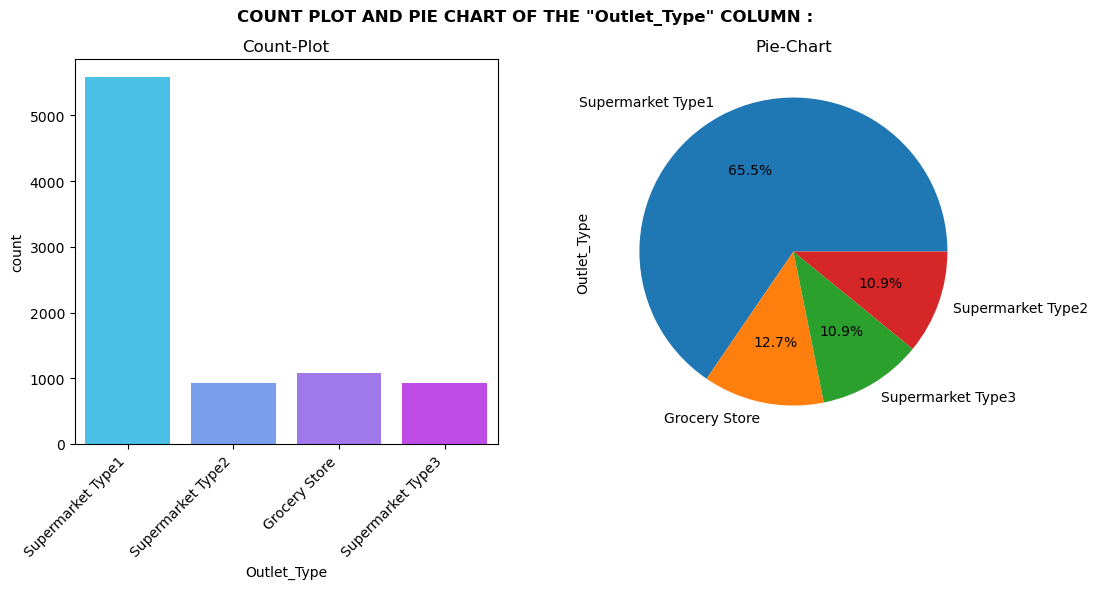

In [74]:
plt.figure(figsize=(12,5))
plt.suptitle('COUNT PLOT AND PIE CHART OF THE "Outlet_Type" COLUMN :',fontweight='bold')

categories=train_df['Outlet_Type'].unique()
ax1=plt.subplot(1,2,1)
ax1.set_title('Count-Plot')
sns.countplot(train_df['Outlet_Type'],palette='cool')
ax1.set_xticklabels(categories,rotation=45, ha='right')

ax2=plt.subplot(1,2,2)
ax2.set_title('Pie-Chart')
train_df['Outlet_Type'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [75]:
train_df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,24,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,14,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,24,Medium,Tier 1,Supermarket Type1,2097.2700


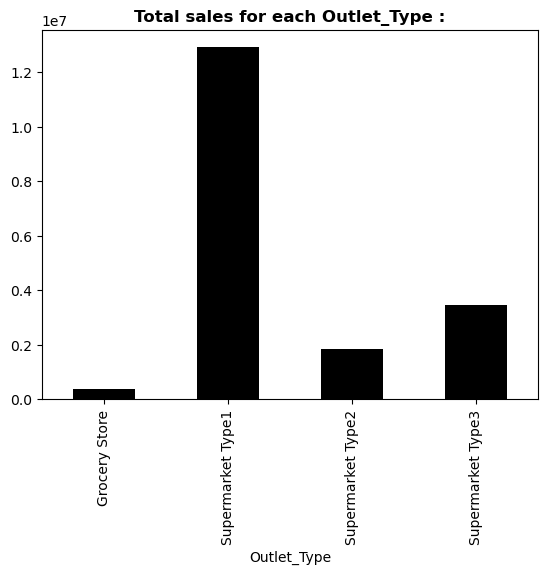

In [103]:
plt.title("Total sales for each Outlet_Type :",fontweight='bold')
train_df.groupby(['Outlet_Type']).sum()['Item_Outlet_Sales'].plot(kind='bar',color='black')
plt.show()

In [85]:
train_df.groupby(['Outlet_Type']).sum()['Item_Outlet_Sales'].round(2)

Outlet_Type
Grocery Store          367913.76
Supermarket Type1    12917342.26
Supermarket Type2     1851822.83
Supermarket Type3     3444468.36
Name: Item_Outlet_Sales, dtype: float64

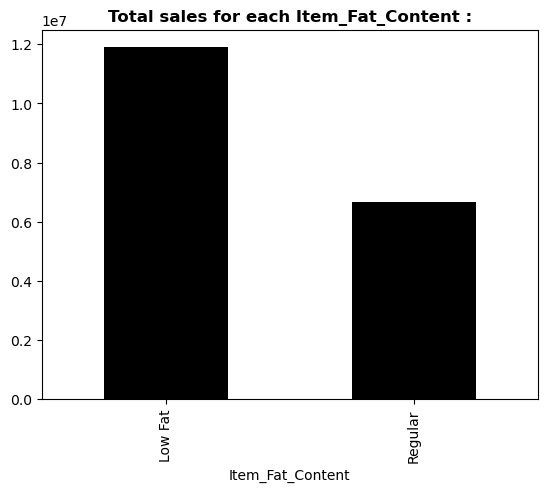

In [102]:
plt.title("Total sales for each Item_Fat_Content :",fontweight='bold')
train_df.groupby(['Item_Fat_Content']).sum()['Item_Outlet_Sales'].plot(kind='bar',color='black')
plt.show()

In [88]:
train_df.groupby(['Item_Fat_Content']).sum()['Item_Outlet_Sales'].round(2)

Item_Fat_Content
Low Fat    11899660.30
Regular     6681886.91
Name: Item_Outlet_Sales, dtype: float64

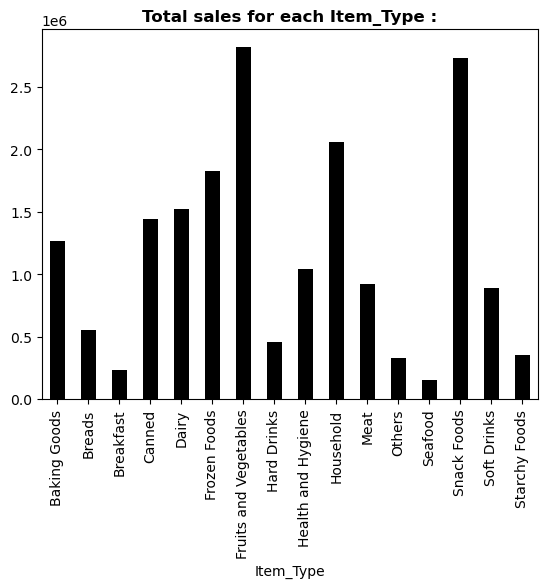

In [101]:
plt.title("Total sales for each Item_Type :",fontweight='bold')
train_df.groupby(['Item_Type']).sum()['Item_Outlet_Sales'].plot(kind='bar',color='black')
plt.show()

In [93]:
train_df.groupby(['Item_Type']).sum()['Item_Outlet_Sales'].round(2)

Item_Type
Baking Goods             1265404.83
Breads                    553237.19
Breakfast                 232298.95
Canned                   1444151.49
Dairy                    1519140.55
Frozen Foods             1824164.83
Fruits and Vegetables    2820059.82
Hard Drinks               457793.43
Health and Hygiene       1045200.14
Household                2055493.71
Meat                      917565.61
Others                    325517.61
Seafood                   148868.22
Snack Foods              2728351.86
Soft Drinks               892897.72
Starchy Foods             351401.25
Name: Item_Outlet_Sales, dtype: float64

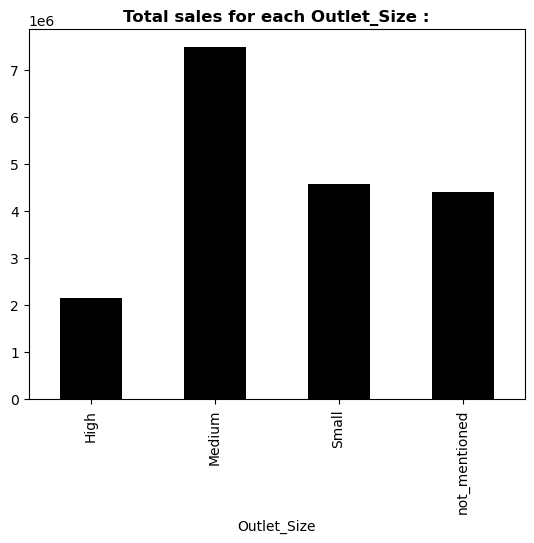

In [100]:
plt.title("Total sales for each Outlet_Size :",fontweight='bold')
train_df.groupby(['Outlet_Size']).sum()['Item_Outlet_Sales'].plot(kind='bar',color='black')
plt.show()

In [96]:
train_df.groupby(['Outlet_Size']).sum()['Item_Outlet_Sales'].round(2)

Outlet_Size
High             2142663.58
Medium           7480261.00
Small            4566091.69
not_mentioned    4392530.94
Name: Item_Outlet_Sales, dtype: float64

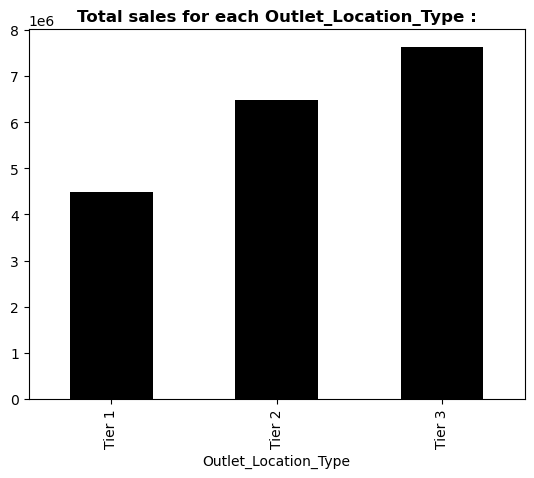

In [99]:
plt.title("Total sales for each Outlet_Location_Type :",fontweight='bold')
train_df.groupby(['Outlet_Location_Type']).sum()['Item_Outlet_Sales'].plot(kind='bar',color='black')
plt.show()

In [98]:
train_df.groupby(['Outlet_Location_Type']).sum()['Item_Outlet_Sales'].round(2)

Outlet_Location_Type
Tier 1    4481938.56
Tier 2    6472313.71
Tier 3    7627294.94
Name: Item_Outlet_Sales, dtype: float64

In [208]:
#train_df.to_csv('train_cleaned.csv',index=False)